## Exploratory Analysis
To begin this exploratory analysis, first use `matplotlib` to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made. (Hey, I'm just a kerneling bot, not a Kaggle Competitions Grandmaster!)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import math
import os 
import pandas as pd 


There are 3 csv files in the current version of the dataset:


In [2]:
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [3]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = math.ceil((nCol + nGraphPerRow - 1) / nGraphPerRow)  # 👈 FIX HERE
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


In [4]:
def plotCorrelationMatrix(df, graphWidth):
    filename = getattr(df, "dataframeName", "Your DataFrame")  # fallback name if attribute doesn't exist
    df = df.dropna(axis=1) 
    df = df[[col for col in df if df[col].nunique() > 1]] 
    df = df.select_dtypes(include=[np.number])  # <<<< This line is the key fix
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of usable columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])  # keep numeric columns
    df = df.dropna(axis=1)  # drop columns with NaNs
    df = df[[col for col in df if df[col].nunique() > 1]]  # drop constant columns
    columnNames = list(df)

    if len(columnNames) > 10:
        columnNames = columnNames[:10]

    df = df[columnNames]

    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')

    corrs = df.corr().values
    for i in range(len(ax)):
        for j in range(len(ax)):
            if i != j:
                ax[i, j].annotate(f'Corr: {corrs[i, j]:.2f}', (0.7, 0.1), xycoords='axes fraction',
                                  ha='center', va='center', fontsize=textSize)

    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/full.csv

In [6]:
nRowsRead = 1000 
df1 = pd.read_csv('./dataset/full.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'full.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 21 columns


Let's take a quick look at what the data looks like:

In [7]:
df1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


Distribution graphs (histogram/bar graph) of sampled columns:

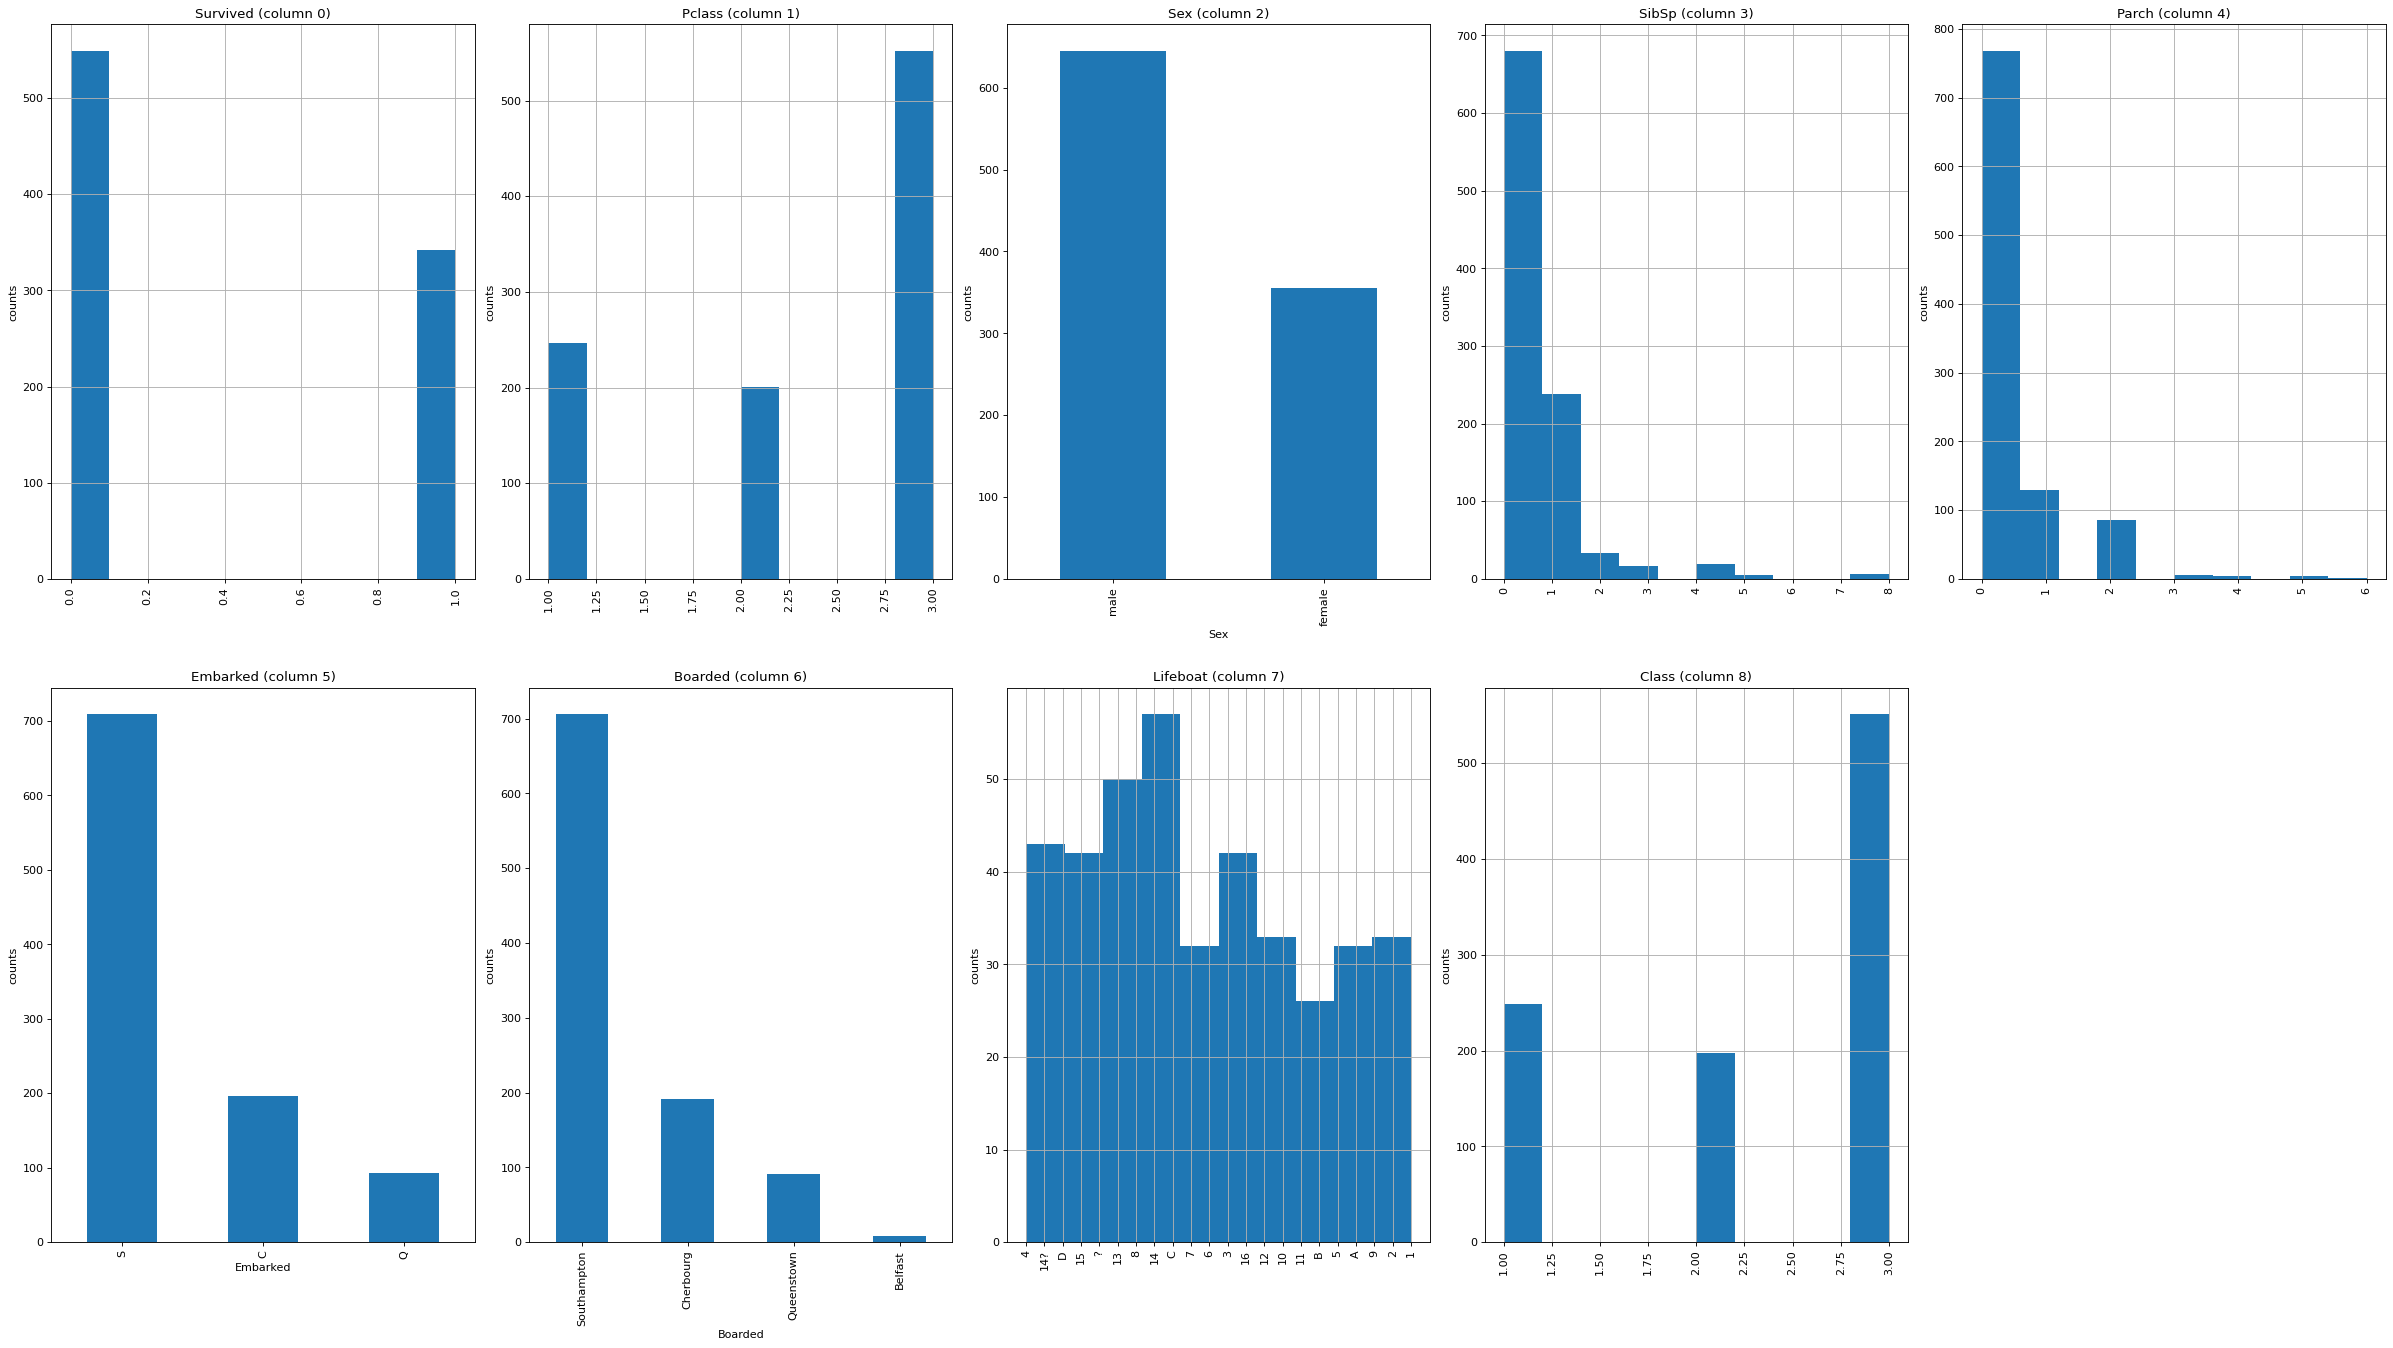

In [8]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

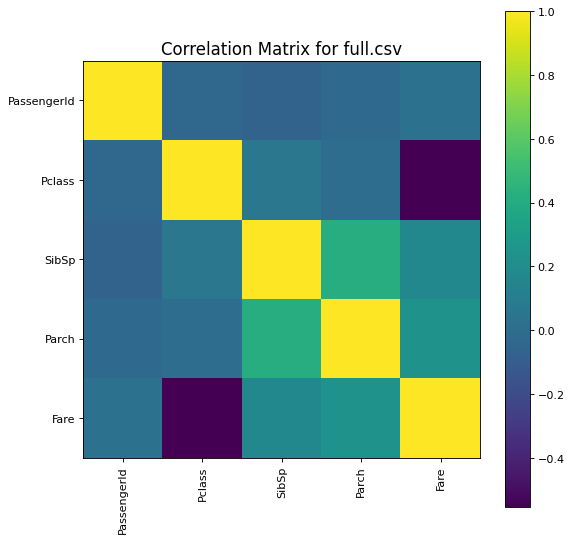

In [9]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

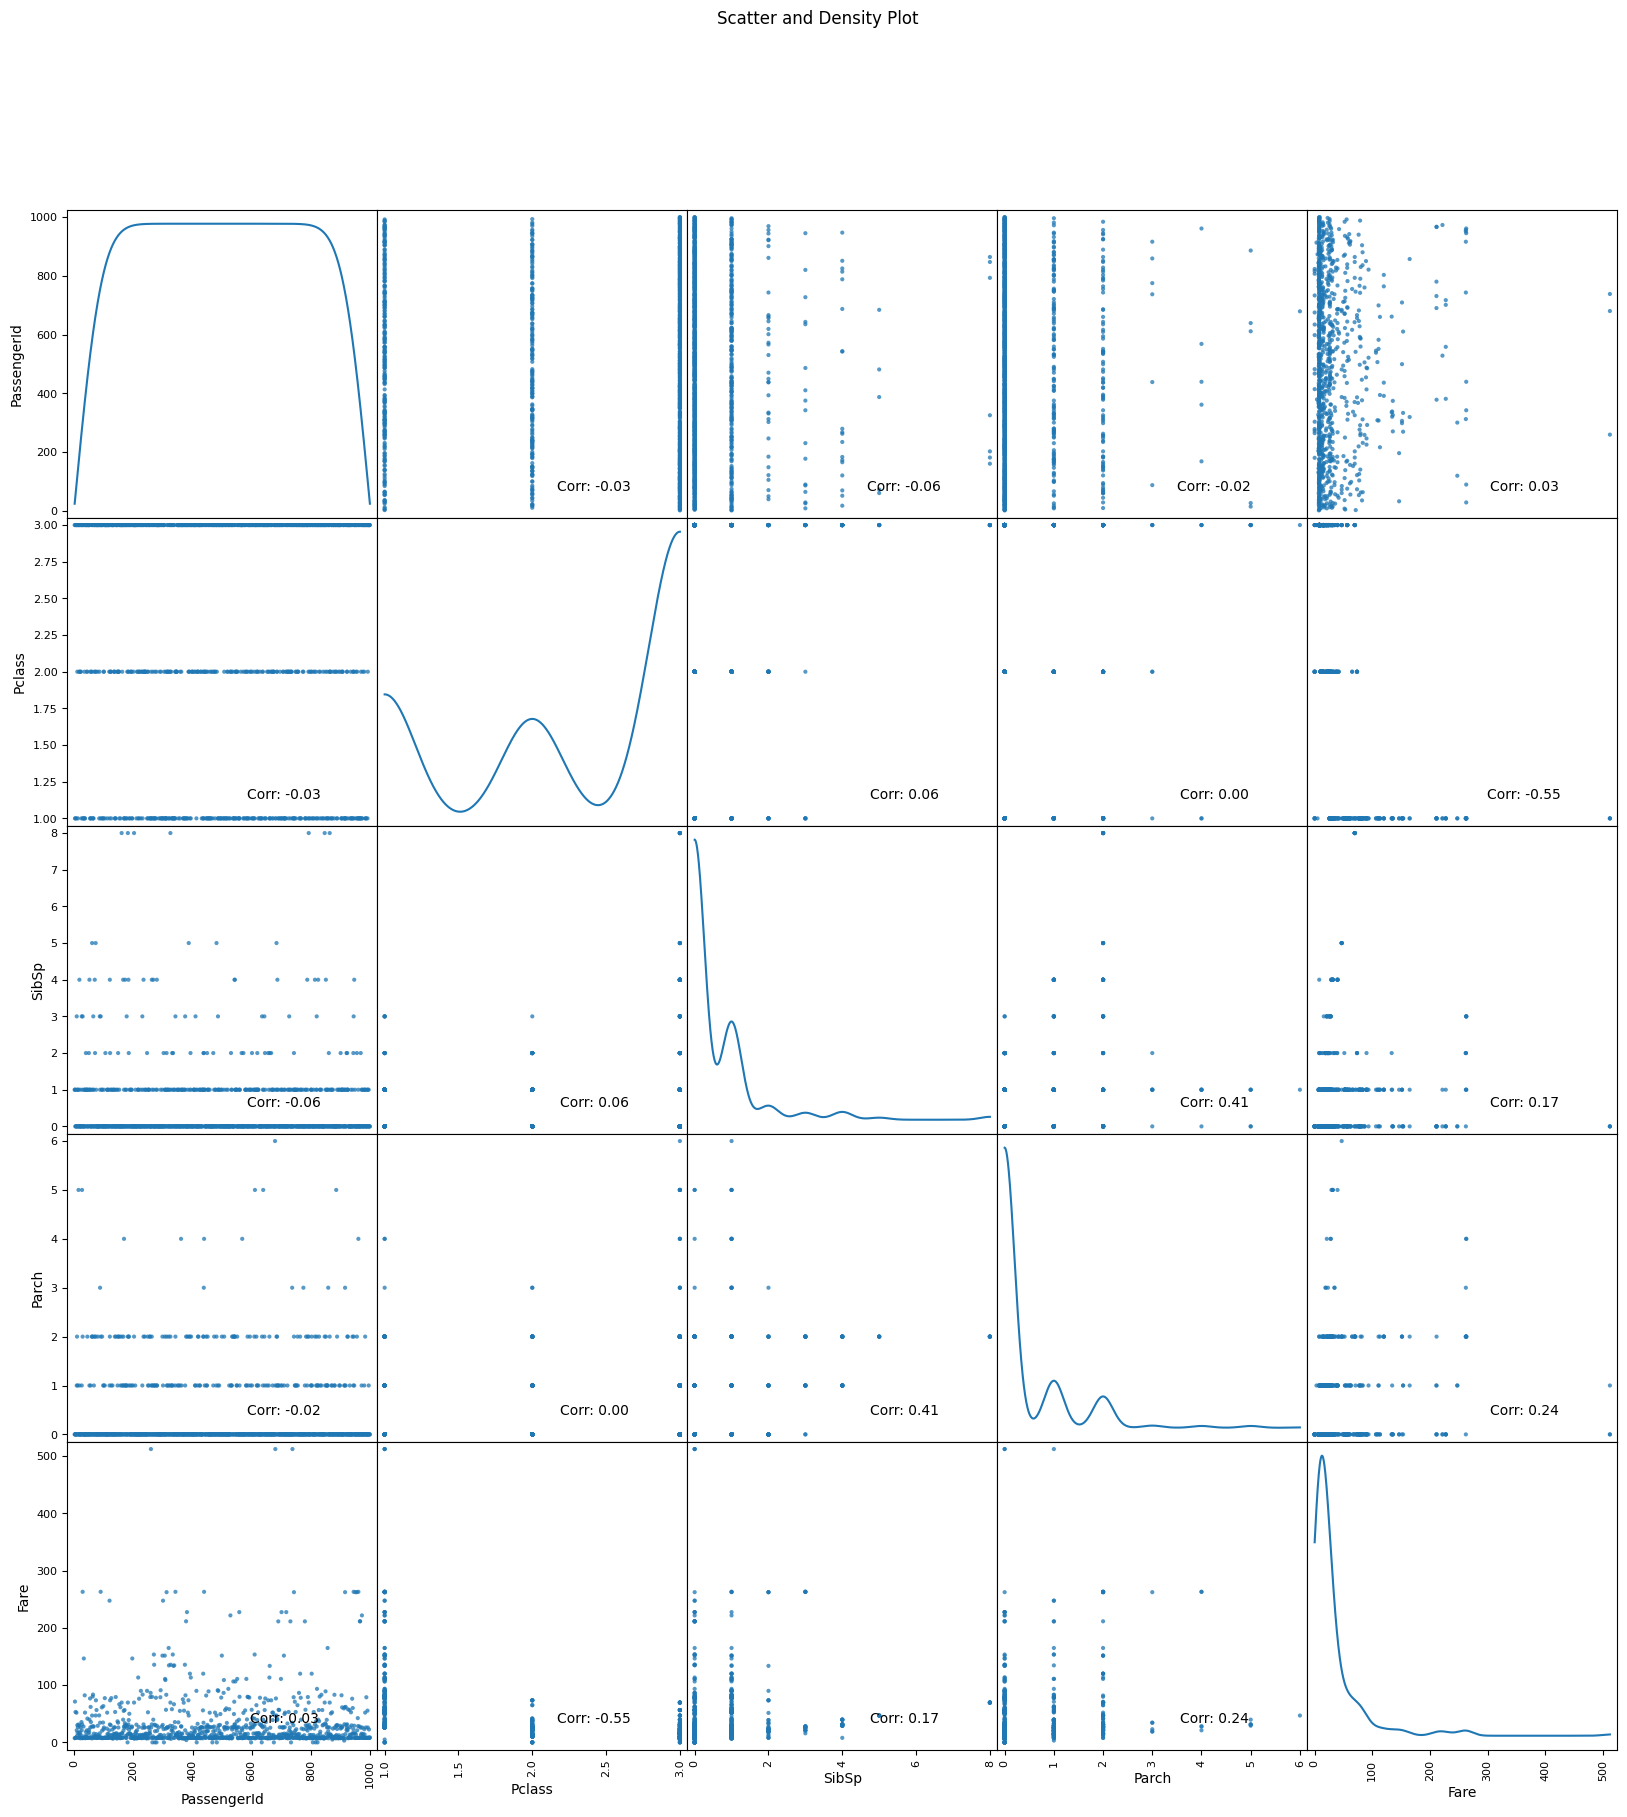

In [10]:
plotScatterMatrix(df1, 20, 10)

### Let's check 2nd file: /kaggle/input/test.csv

In [11]:
nRowsRead = 1000 
df2 = pd.read_csv('./dataset/test.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'test.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 418 rows and 20 columns


Let's take a quick look at what the data looks like:

In [12]:
df2.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,928.0,"Kelly, Mr. James",19.0,"Unknown, Ireland",Southampton,New York City,NaN,70MB,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1297.0,"Wilkes, Mrs. Ellen",47.0,"Penzance, Cornwall, England",Southampton,"Akron, Ohio, US",16,NaN,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,518.0,"Myles, Mr. Thomas Francis",63.0,"Fermoy, Ireland[note 1]",Queenstown,"Waban, Massachusetts, US",NaN,NaN,2.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1303.0,"Wirz, Mr. Albert",27.0,"Uster, Switzerland",Southampton,"Beloit, Wisconsin, US",NaN,131MB,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,871.0,"Hirvonen, Mrs. Helga Elisabeth (née Lindqvist)",22.0,"Taalintehdas, Finland",Southampton,"Monessen, Pennsylvania, US",15,NaN,3.0


Distribution graphs (histogram/bar graph) of sampled columns:

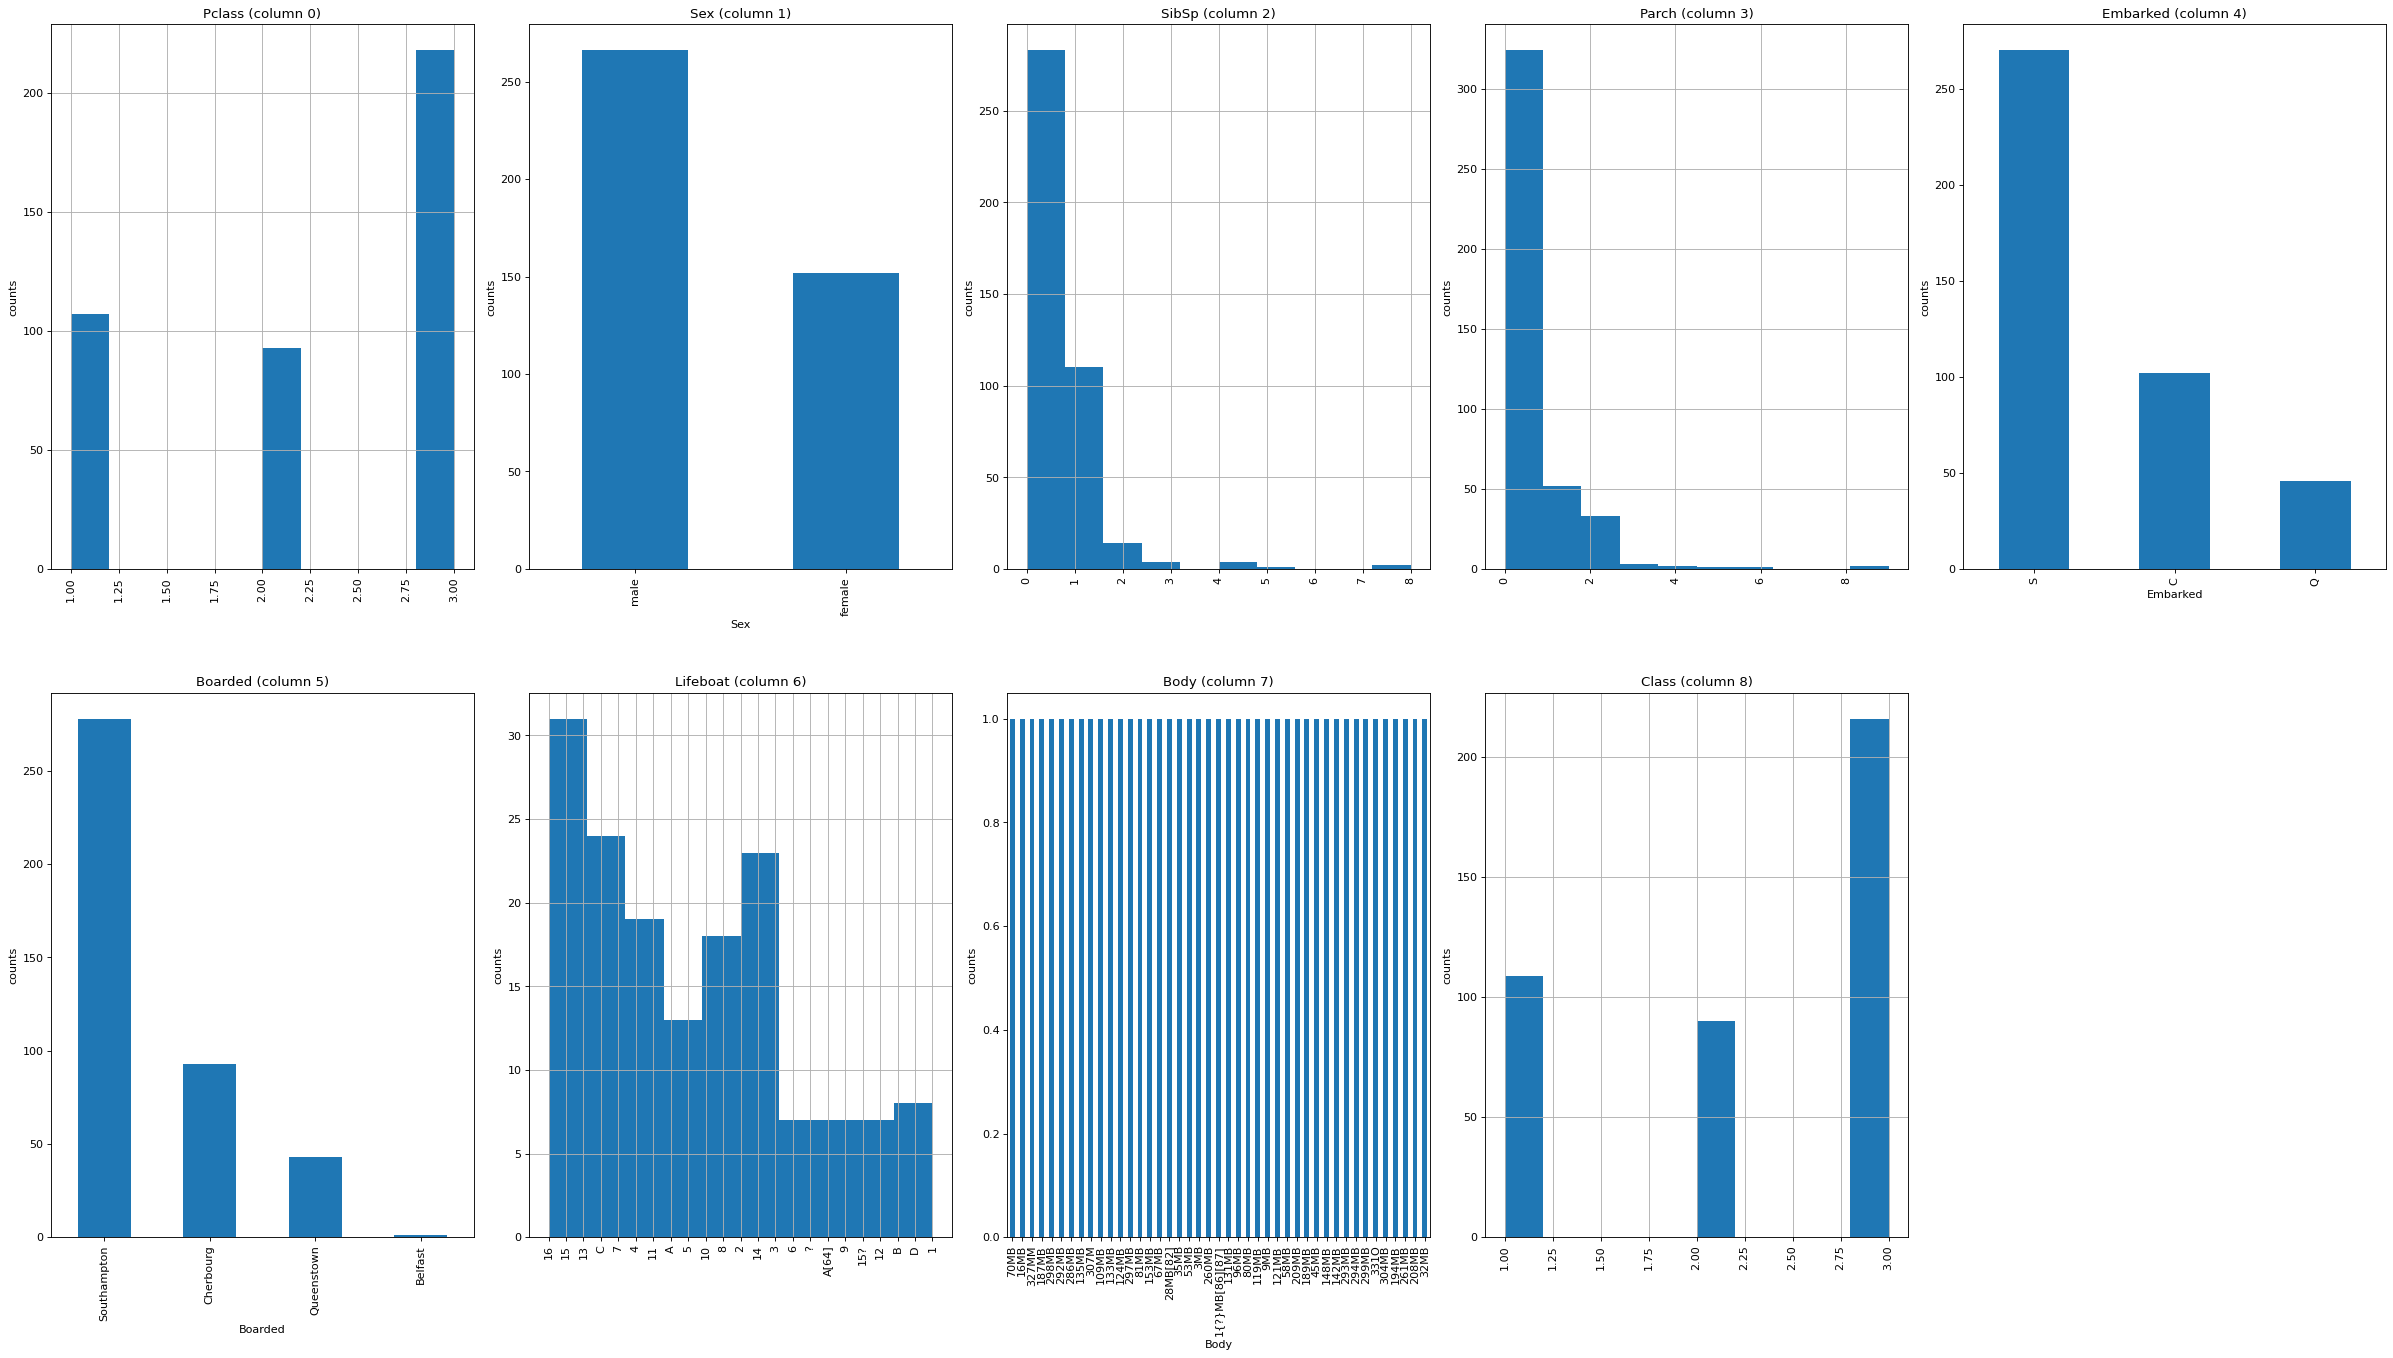

In [13]:
plotPerColumnDistribution(df2, 10, 5)

Correlation matrix:

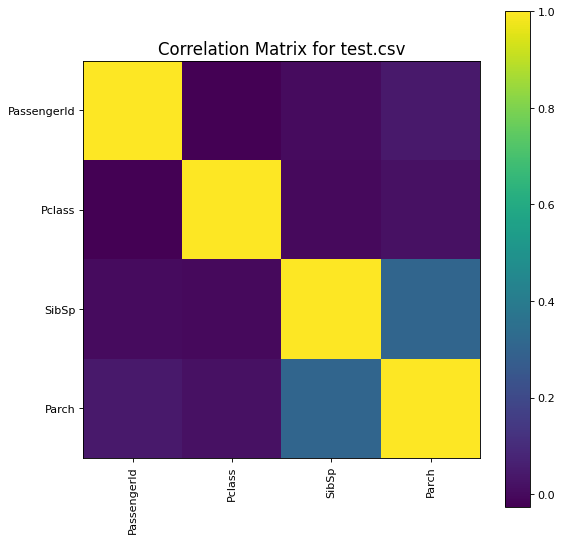

In [14]:
plotCorrelationMatrix(df2, 8)

Scatter and density plots:

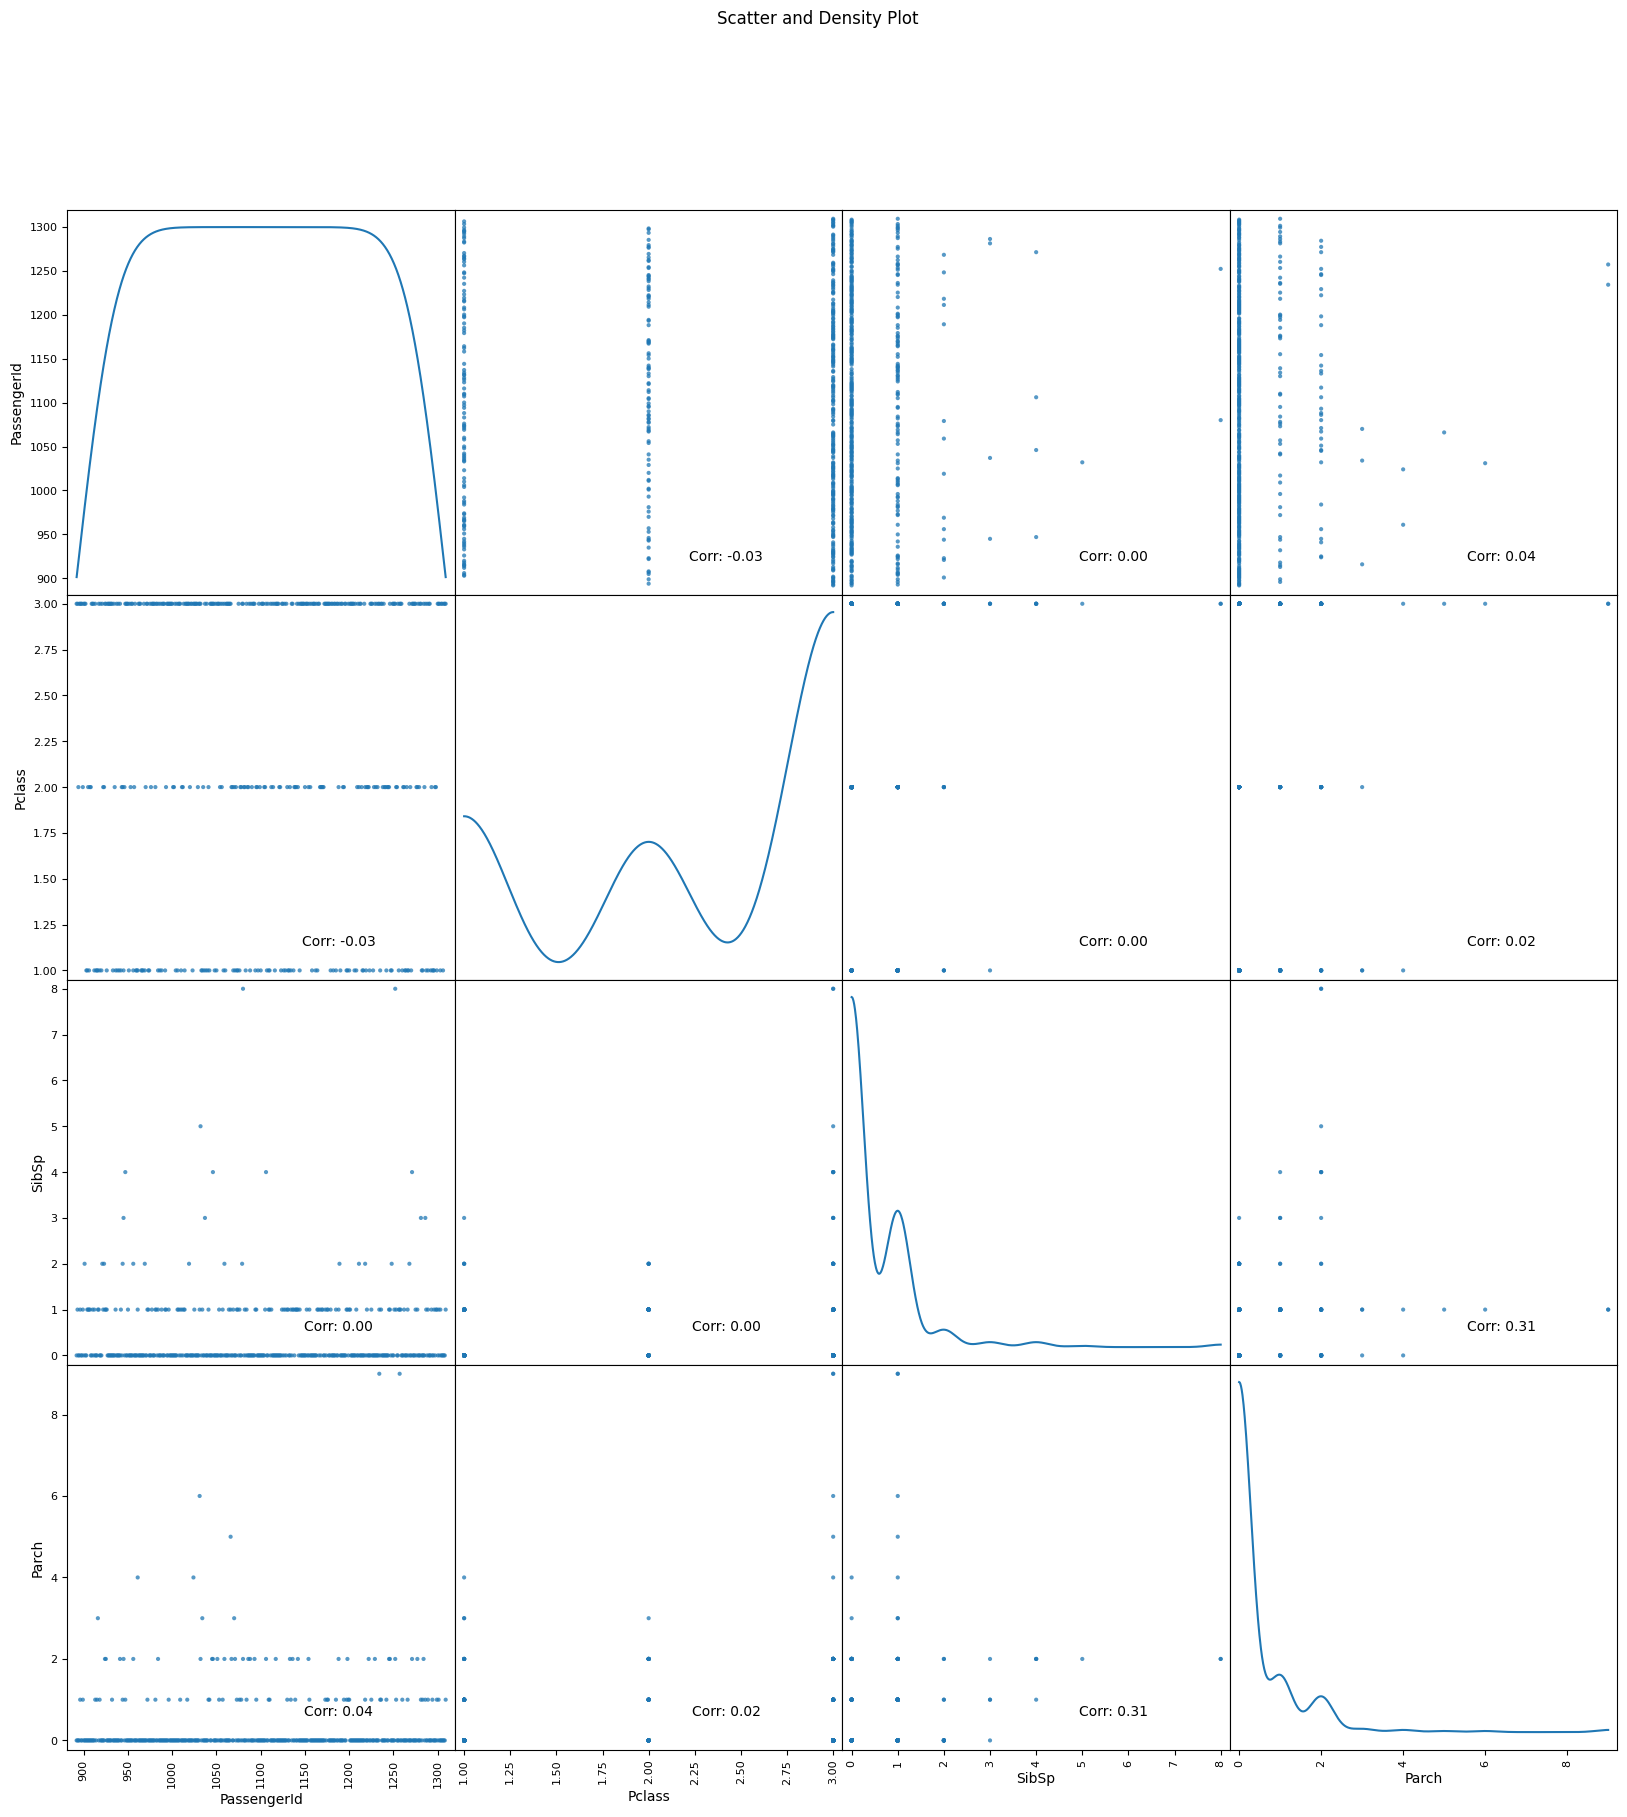

In [15]:
plotScatterMatrix(df2, 20, 10)

### Let's check 3rd file: /kaggle/input/train.csv

In [16]:
nRowsRead = 1000 
df3 = pd.read_csv('./dataset/train.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'train.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 891 rows and 21 columns


Let's take a quick look at what the data looks like:

In [17]:
df3.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


Distribution graphs (histogram/bar graph) of sampled columns:

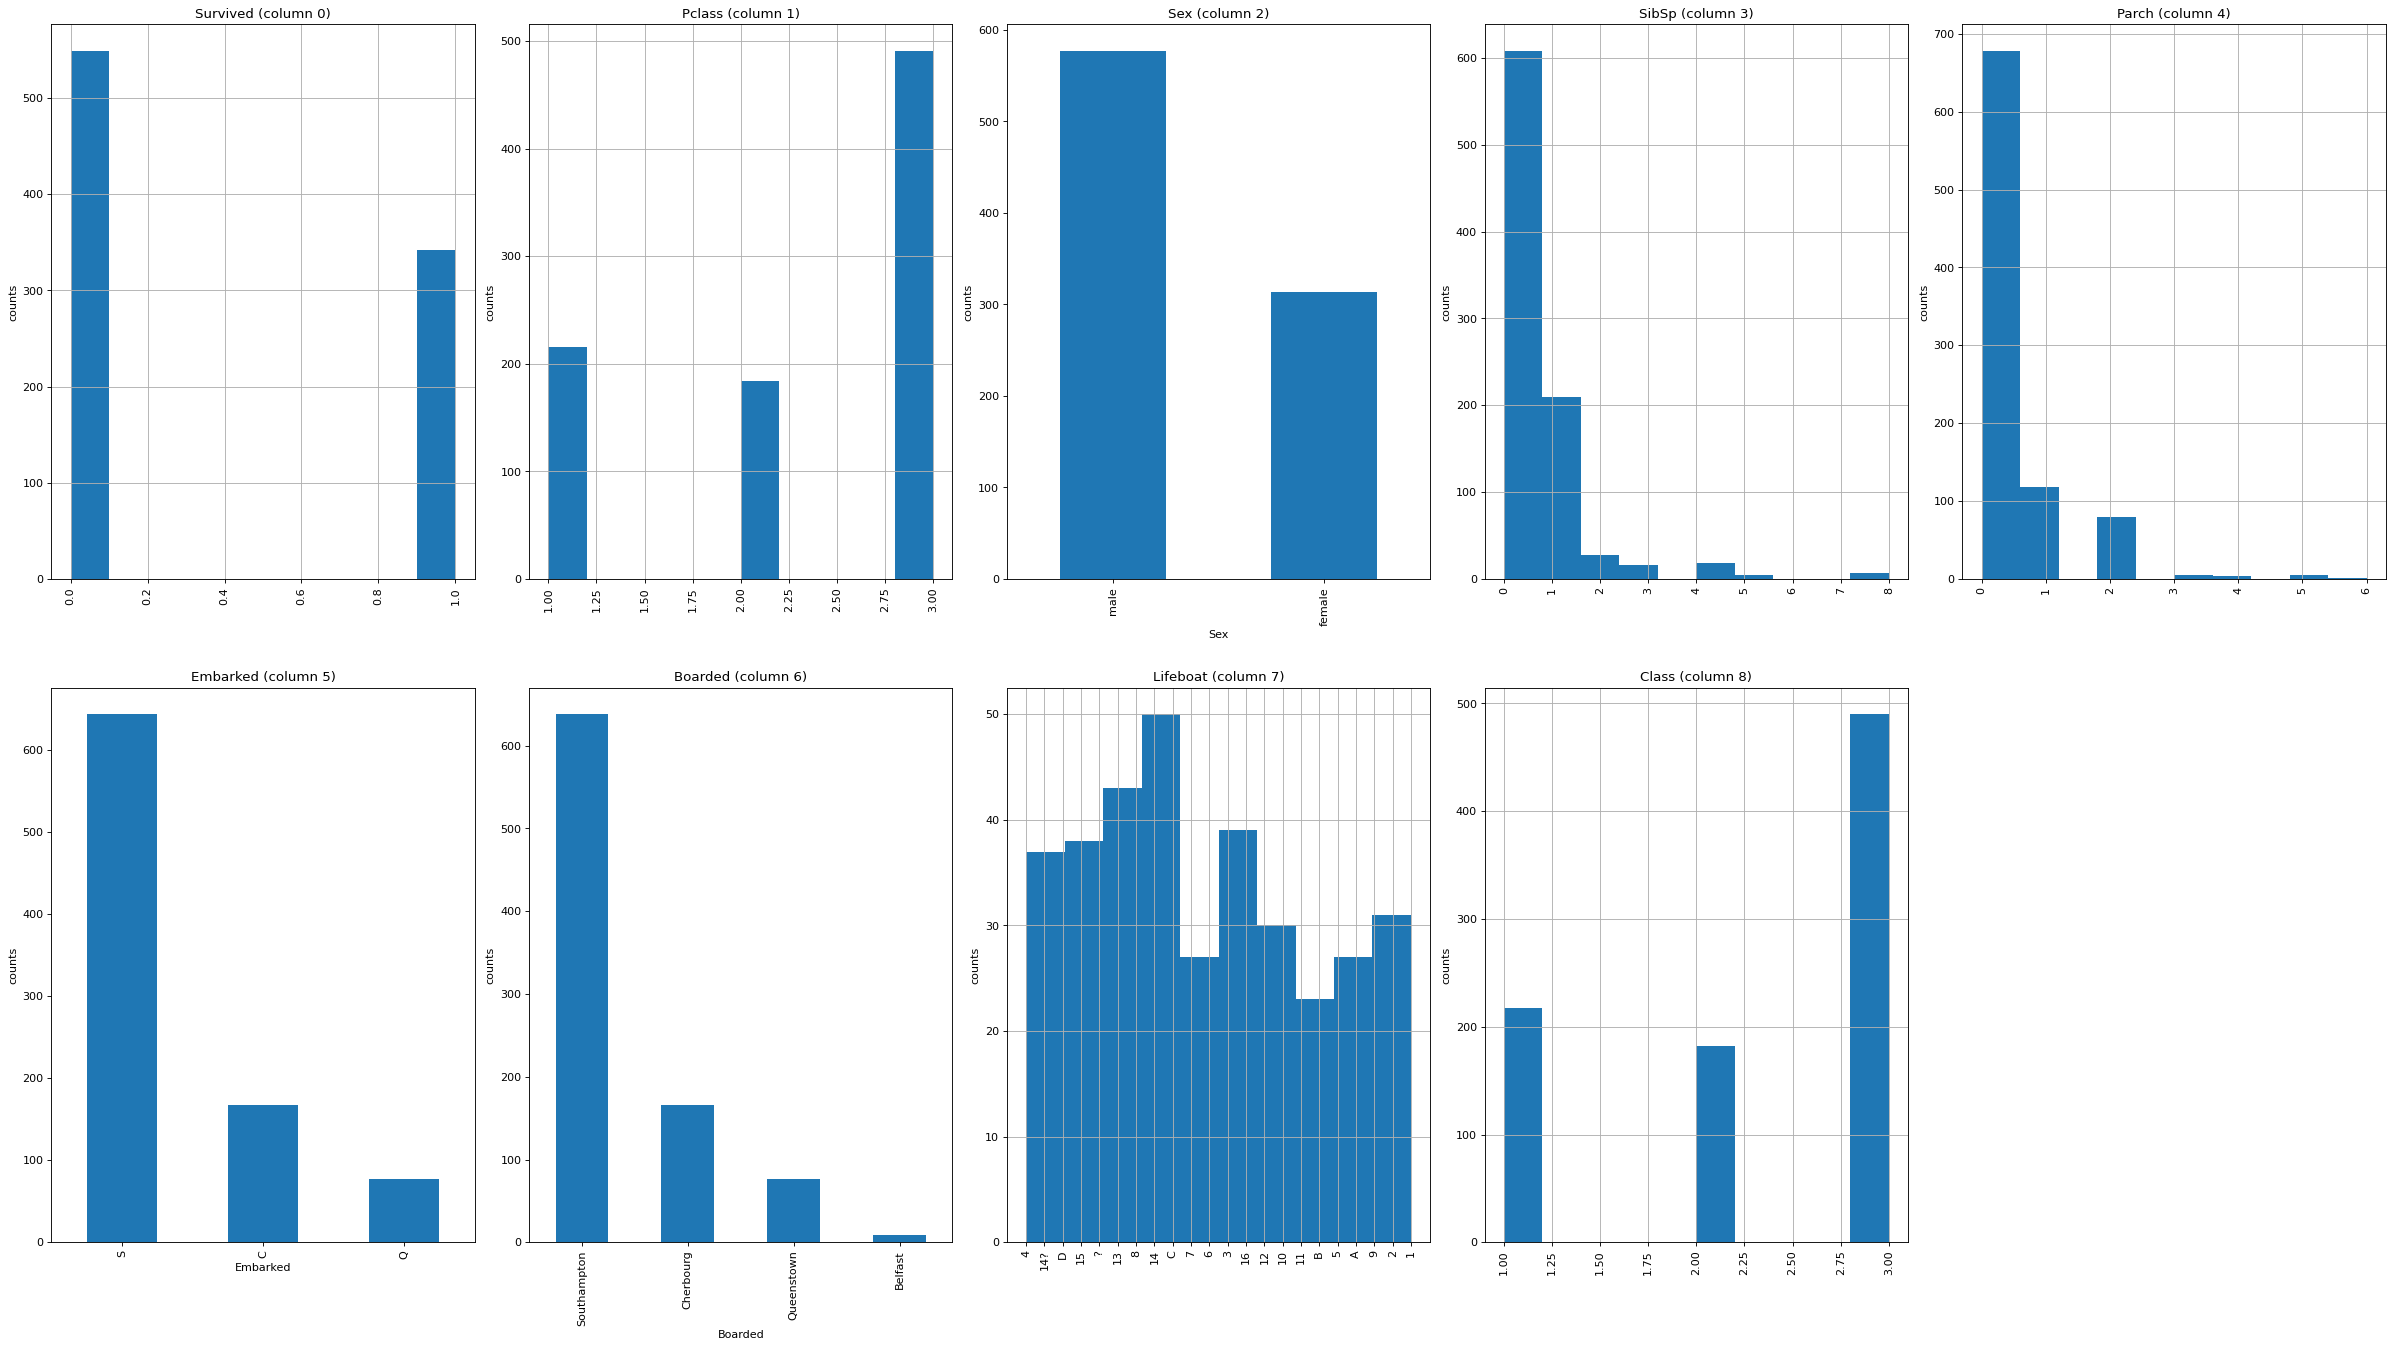

In [18]:
plotPerColumnDistribution(df3, 10, 5)

Correlation matrix:

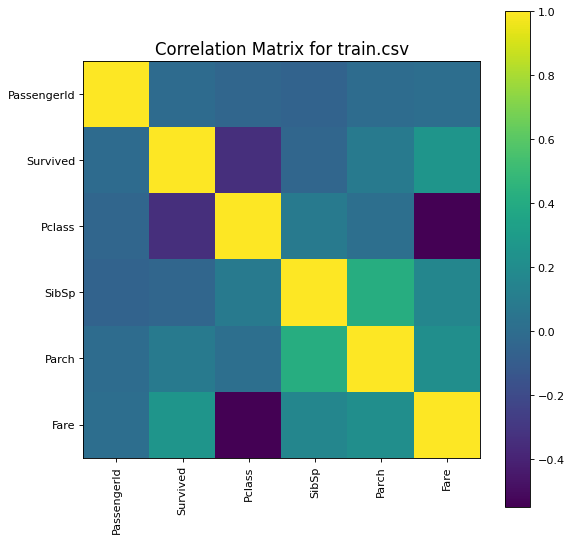

In [19]:
plotCorrelationMatrix(df3, 8)

Scatter and density plots:

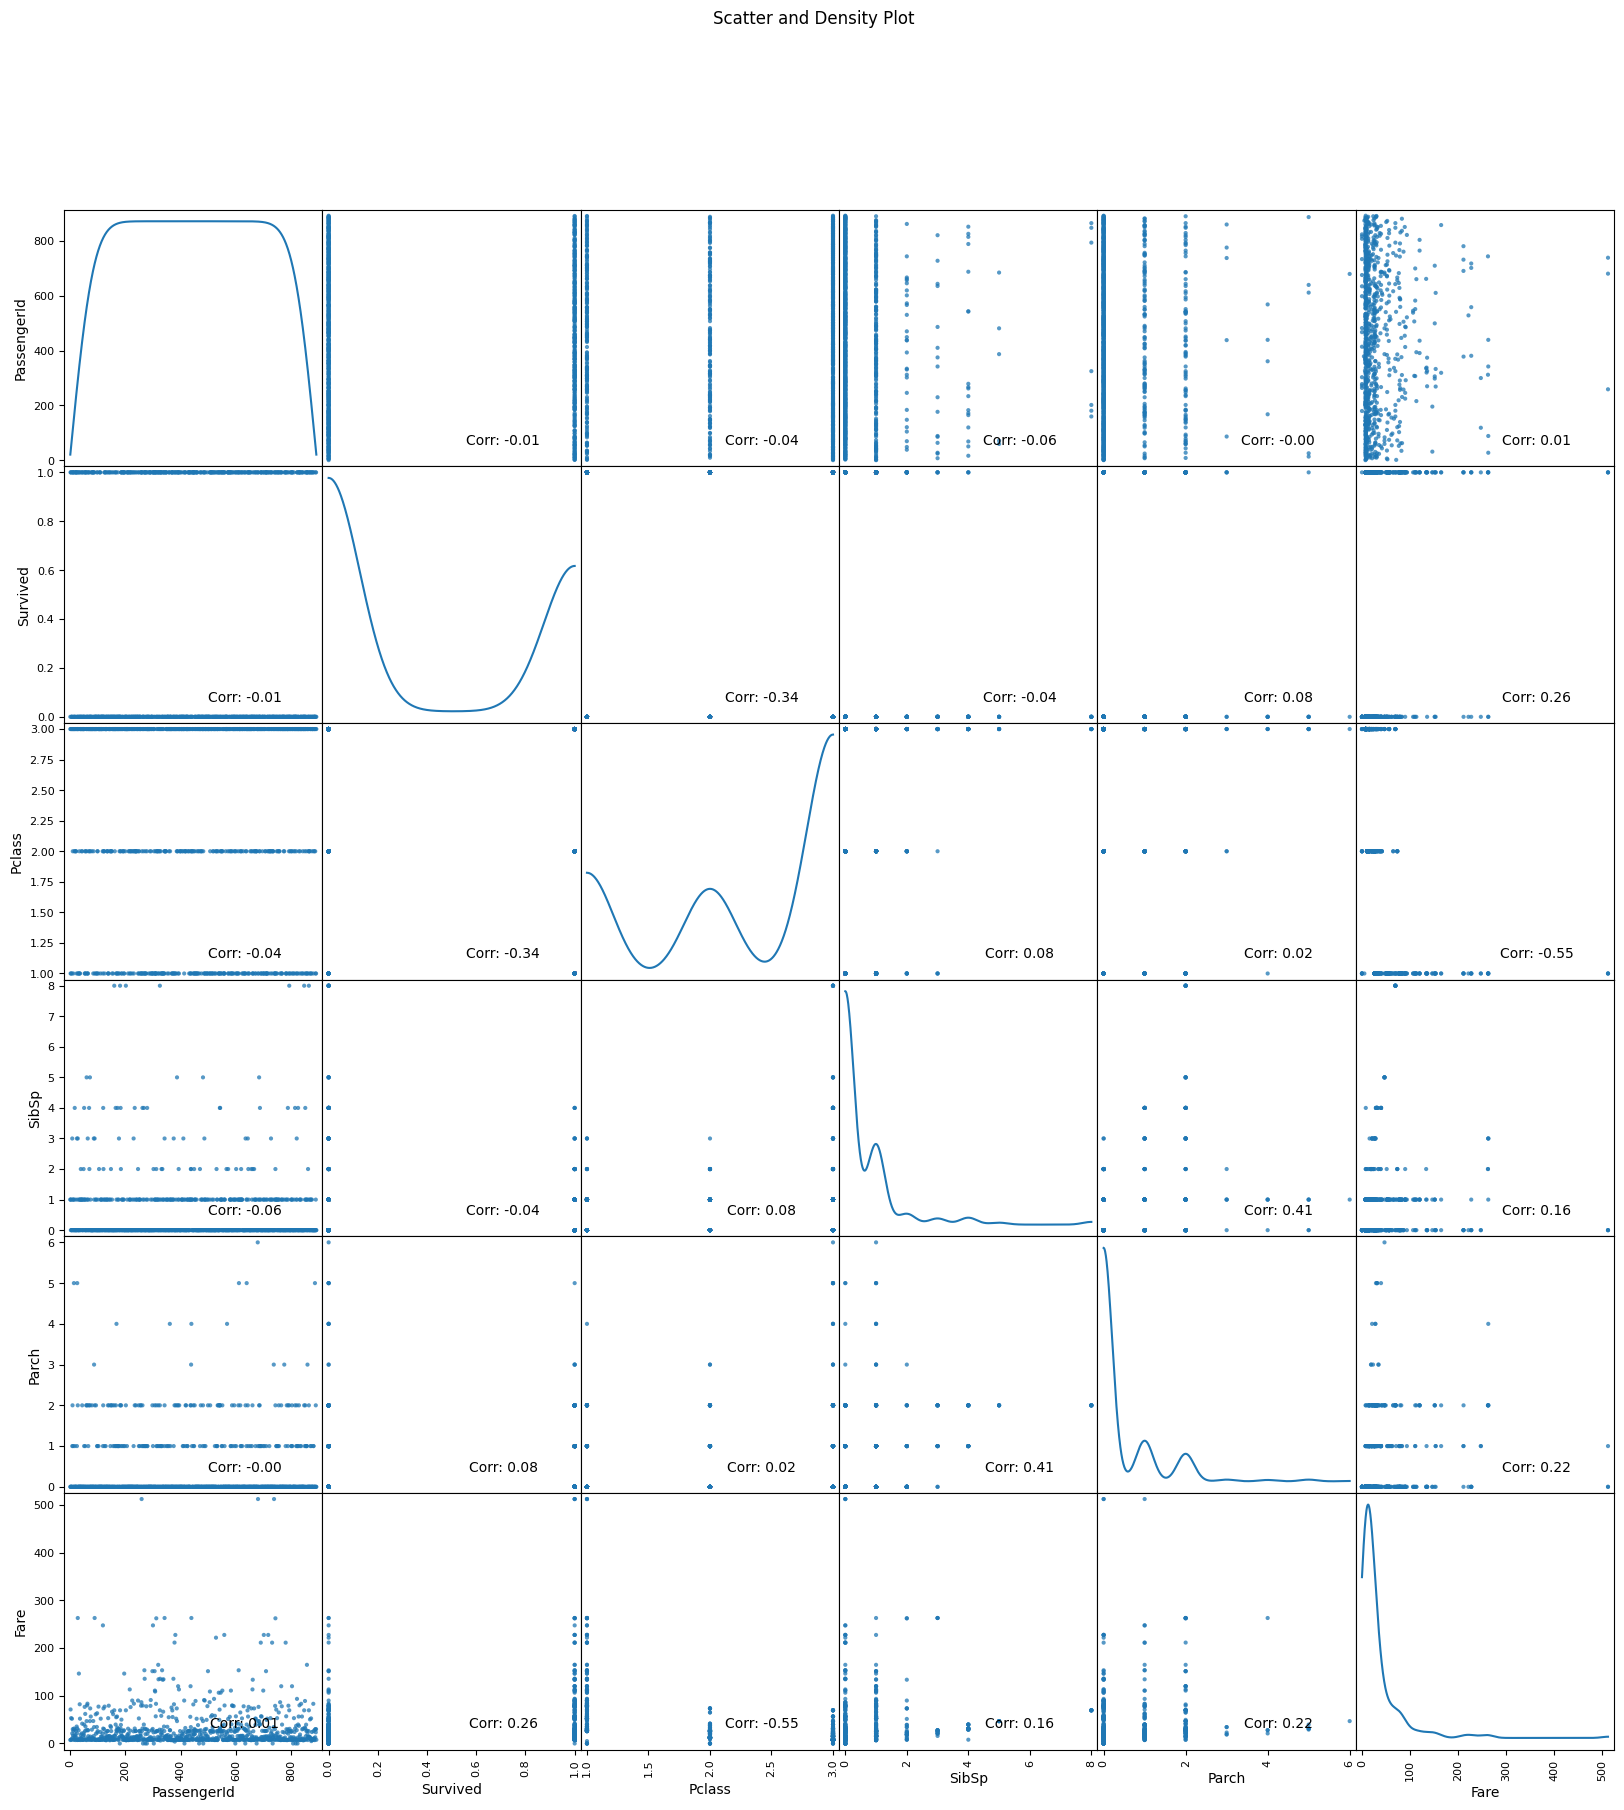

In [20]:
plotScatterMatrix(df3, 20, 10)

## Conclusion
This concludes your starter analysis! To go forward from here, click the blue "Edit Notebook" button at the top of the kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!